<a href="https://colab.research.google.com/github/zahra-0201/Machine-Learning/blob/main/praktikum06svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 3/ML/praktikum/praktikum06/data/Iris.csv', sep=',')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #fiturnya
#kolom target (label)
y = df['Species'] #ini targetnya

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [11]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#buat model
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [13]:
#model svm dgn kernel linear
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
#evaluasi model
y_pred = model.predict(X_test)
#akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred)* 100:.2f}%")
#laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




Confusion MatrixL
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


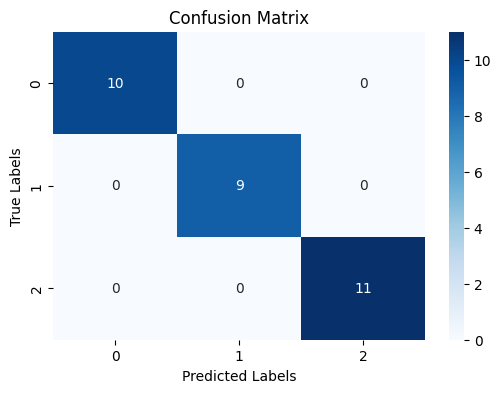

In [15]:
#data visualizartion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion MatrixL\n", confusion_matrix(y_test, y_pred))

#buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

#jika kamu tau nama kelas
#misal, class_names = ['negatif', 'positif']
#maka tambahkan ke heatmap di bagian xticklabels dan yticklabels

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

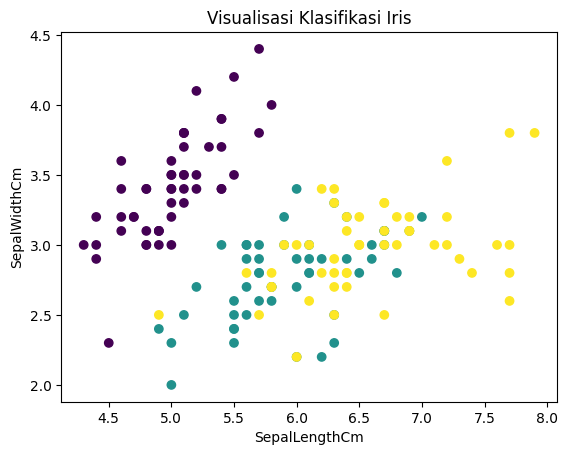

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Visualisasi Klasifikasi Iris')
plt.show()

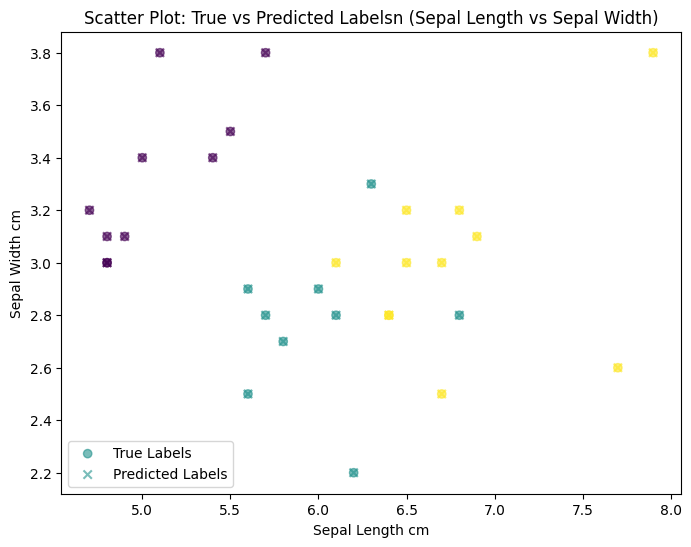

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#re encode y_test for plotting
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8, 6))

#plot titik berdasarkan label asli
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
            c=y_test_encoded, cmap='viridis', marker='o', label='True Labels', alpha=0.6)

#plot titik berdasarkan label hasil prediksi
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
            c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.6)

plt.title("Scatter Plot: True vs Predicted Labelsn (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.legend()
plt.show()

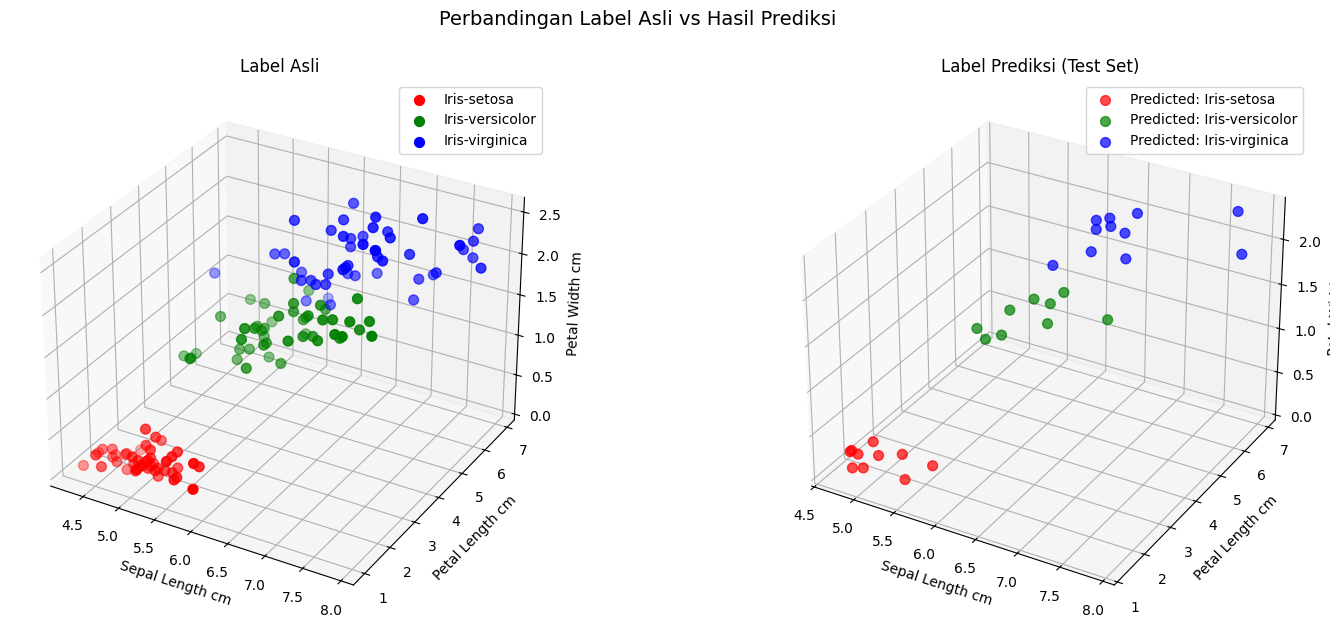

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# 3. encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

#warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

fig = plt.figure(figsize=(18, 7)) # Corrected variable name

#plot 1: Label Asli
ax1 = fig.add_subplot(121, projection='3d') # Corrected variable name
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax1.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'], # Corrected typo
        color=colors[i],
        label=species,
        s=50
    )

ax1.set_title('Label Asli')
ax1.set_xlabel('Sepal Length cm')
ax1.set_ylabel('Petal Length cm')
ax1.set_zlabel('Petal Width cm')
ax1.legend()

#plot 2: label prediksi
ax2 = fig.add_subplot(122, projection='3d') # Corrected variable name

# Create a DataFrame for the test set with predicted labels
test_df = df.loc[X_test.index].copy() # Use .copy() to avoid SettingWithCopyWarning
test_df['Predicted'] = y_pred

# Encode predicted labels
test_df['PredictedEncoded'] = le.transform(test_df['Predicted'])


#visualisasi 3d berdasarkan hasil prediksi
#plot tiap spesies dengan warna berbeda based on predicted label
for i, species_labels in enumerate(labels):
    subset = test_df[test_df['PredictedEncoded'] == i]

    ax2.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'], # Corrected typo
        color=colors[i],
        label=f"Predicted: {species_labels}",
        s=50,
        alpha=0.7
    )

ax2.set_xlabel('Sepal Length cm')
ax2.set_ylabel('Petal Length cm')
ax2.set_zlabel('Petal Width cm')
ax2.set_title('Label Prediksi (Test Set)')
ax2.legend()

plt.suptitle('Perbandingan Label Asli vs Hasil Prediksi', fontsize=14)
plt.show()